In [1]:
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import math

pd.set_option('max_columns', 50)
mpl.rcParams['lines.linewidth'] = 2

%matplotlib inline

df = pd.read_excel('MonumentUserData2.xlsx')
print(len(df))
df.head()
#len(df)

90302


,user_id,cnt,activated,month
0,21,36,2019-12-16 00:00:00,2019-11-18 00:00:00
1,1569,12,2019-12-16 00:00:00,2019-11-18 00:00:00
2,1547,4,2019-01-17 00:00:00,2019-11-18 00:00:00
3,185,28,2019-11-16 00:00:00,2019-11-18 00:00:00
4,4322,47,2019-03-17 00:00:00,2019-11-18 00:00:00


In [2]:
df = df.drop_duplicates()
df=df[pd.to_numeric(df['cnt'], errors='coerce').notnull()]
print(len(df))

76100


In [3]:
df2=pd.DataFrame()
dateParts=pd.DataFrame()
df2['actDate'] = df['activated']
df2['WrongDate'] = pd.to_datetime(df2['actDate'].astype(str),errors='coerce',format='%Y-%m-%d')
dateParts['year']=df2['WrongDate'].map(lambda x: 2000+x.day)
dateParts['month']=df2['WrongDate'].map(lambda x: x.month)
dateParts['day']=df2['WrongDate'].map(lambda x: 1)
df['activated'] = pd.to_datetime(dateParts,format='%Y-%m').dt.strftime('%Y-%m')

df2=pd.DataFrame()
dateParts=pd.DataFrame()
df2['useDate'] = df['month']
df2['WrongDate'] = pd.to_datetime(df2['useDate'].astype(str),errors='coerce',format='%Y-%m-%d')
dateParts['year']=df2['WrongDate'].map(lambda x: 2000+x.day)
dateParts['month']=df2['WrongDate'].map(lambda x: x.month)
dateParts['day']=df2['WrongDate'].map(lambda x: 1)
df['month'] = pd.to_datetime(dateParts,format='%Y-%m').dt.strftime('%Y-%m')
df.head()


,user_id,cnt,activated,month
0,21,36,2016-12,2018-11
1,1569,12,2016-12,2018-11
2,1547,4,2017-01,2018-11
3,185,28,2016-11,2018-11
4,4322,47,2017-03,2018-11


In [4]:
grouped01 = df.groupby(['activated'])
# count the unique users per cohort
SizePerCohort = grouped01.agg({'user_id':pd.Series.nunique})
SizePerCohort.rename(columns={'user_id': 'Size'}, inplace=True)
SizePerCohort=SizePerCohort['Size'].groupby(level=0).first()
SizePerCohort.head()
#len(SizePerCohort)

activated
2016-11     24
2016-12    400
2017-01    208
2017-02     84
2017-03    103
Name: Size, dtype: int64

In [5]:
grouped = df.groupby(['activated', 'month'])
# count the unique users, orders, and total activities per Group 
cohorts = grouped.agg({'user_id':pd.Series.nunique,
                      'cnt':np.sum})
cohorts.rename(columns={'user_id': 'TotalUsers'}, inplace=True)
cohorts['Ave Act/User']=round(cohorts.cnt/cohorts.TotalUsers)
# reindex the DataFrame
#cohorts.reset_index(inplace=True)
cohorts.head(12)

TotalUsers     cnt  Ave Act/User
activated month                                    
2016-11   2018-11          19    2409         127.0
          2018-12          18    9904         550.0
          2019-01          20    5759         288.0
          2019-02          13    8857         681.0
          2019-03          13    5680         437.0
          2019-04          21    4274         204.0
          2019-05          21    3125         149.0
          2019-06          20    5392         270.0
          2019-07          18    2316         129.0
          2019-08           9    1666         185.0
2016-12   2018-11         301   60908         202.0
          2018-12         310  214903         693.0

In [6]:
cohorts['TotalUsers'].unstack(0).head(12)

activated,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-11,19,301,151,66,76,50,36,29,20,17,29,30,20,77,53,77,124,95,121,142,215,189,184,214,403,21,17,11,13,15,8,17,8,6,15
2018-12,18,310,156,66,73,47,41,30,22,14,32,27,23,82,52,80,128,90,117,138,210,177,178,191,373,1049,30,15,18,19,11,22,7,7,17
2019-01,20,285,144,60,70,43,37,32,24,14,31,23,22,75,46,71,117,80,104,121,188,156,154,176,326,931,740,26,17,21,15,22,8,10,19
2019-02,13,228,124,56,56,38,23,21,12,10,23,16,14,56,36,51,85,66,85,97,134,125,121,143,254,750,594,529,32,22,17,22,8,11,18
2019-03,13,226,117,50,54,40,29,23,19,10,23,18,13,55,32,47,87,62,83,91,129,124,125,139,226,700,495,435,413,29,21,26,10,9,16
2019-04,21,284,150,62,66,47,36,27,21,14,29,21,21,71,44,71,115,84,100,116,174,146,152,172,289,781,544,430,365,398,28,30,12,10,21
2019-05,21,263,133,63,69,44,35,23,18,12,30,20,19,69,38,69,108,75,99,113,167,146,141,155,271,745,505,395,336,356,462,28,14,13,21
2019-06,20,267,135,63,66,44,31,23,20,13,28,21,21,67,44,68,109,82,101,121,164,135,137,154,268,737,502,387,312,331,399,326,20,13,21
2019-07,18,252,130,60,60,41,27,20,18,13,28,19,15,64,38,56,101,72,92,96,154,139,126,142,247,687,448,348,291,300,350,278,432,16,23


In [7]:
user_retention = cohorts['TotalUsers'].unstack(0).divide(SizePerCohort, axis=1)
user_retention.head(17)

activated,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-11,0.791667,0.7525,0.725962,0.785714,0.737864,0.793651,0.765957,0.763158,0.689655,0.85,0.674419,0.750,0.714286,0.836957,0.779412,0.819149,0.770186,0.887850,0.834483,0.860606,0.863454,0.847534,0.888889,0.955357,1.000000,0.019905,0.022973,0.020716,0.031477,0.037688,0.017316,0.051829,0.018433,0.016304,0.384615
2018-12,0.750000,0.7750,0.750000,0.785714,0.708738,0.746032,0.872340,0.789474,0.758621,0.70,0.744186,0.675,0.821429,0.891304,0.764706,0.851064,0.795031,0.841121,0.806897,0.836364,0.843373,0.793722,0.859903,0.852679,0.925558,0.994313,0.040541,0.028249,0.043584,0.047739,0.023810,0.067073,0.016129,0.019022,0.435897
2019-01,0.833333,0.7125,0.692308,0.714286,0.679612,0.682540,0.787234,0.842105,0.827586,0.70,0.720930,0.575,0.785714,0.815217,0.676471,0.755319,0.726708,0.747664,0.717241,0.733333,0.755020,0.699552,0.743961,0.785714,0.808933,0.882464,1.000000,0.048964,0.041162,0.052764,0.032468,0.067073,0.018433,0.027174,0.487179
2019-02,0.541667,0.5700,0.596154,0.666667,0.543689,0.603175,0.489362,0.552632,0.413793,0.50,0.534884,0.400,0.500000,0.608696,0.529412,0.542553,0.527950,0.616822,0.586207,0.587879,0.538153,0.560538,0.584541,0.638393,0.630273,0.710900,0.802703,0.996234,0.077482,0.055276,0.036797,0.067073,0.018433,0.029891,0.461538
2019-03,0.541667,0.5650,0.562500,0.595238,0.524272,0.634921,0.617021,0.605263,0.655172,0.50,0.534884,0.450,0.464286,0.597826,0.470588,0.500000,0.540373,0.579439,0.572414,0.551515,0.518072,0.556054,0.603865,0.620536,0.560794,0.663507,0.668919,0.819209,1.000000,0.072864,0.045455,0.079268,0.023041,0.024457,0.410256
2019-04,0.875000,0.7100,0.721154,0.738095,0.640777,0.746032,0.765957,0.710526,0.724138,0.70,0.674419,0.525,0.750000,0.771739,0.647059,0.755319,0.714286,0.785047,0.689655,0.703030,0.698795,0.654709,0.734300,0.767857,0.717122,0.740284,0.735135,0.809793,0.883777,1.000000,0.060606,0.091463,0.027650,0.027174,0.538462
2019-05,0.875000,0.6575,0.639423,0.750000,0.669903,0.698413,0.744681,0.605263,0.620690,0.60,0.697674,0.500,0.678571,0.750000,0.558824,0.734043,0.670807,0.700935,0.682759,0.684848,0.670683,0.654709,0.681159,0.691964,0.672457,0.706161,0.682432,0.743879,0.813559,0.894472,1.000000,0.085366,0.032258,0.035326,0.538462
2019-06,0.833333,0.6675,0.649038,0.750000,0.640777,0.698413,0.659574,0.605263,0.689655,0.65,0.651163,0.525,0.750000,0.728261,0.647059,0.723404,0.677019,0.766355,0.696552,0.733333,0.658635,0.605381,0.661836,0.687500,0.665012,0.698578,0.678378,0.728814,0.755448,0.831658,0.863636,0.993902,0.046083,0.035326,0.538462
2019-07,0.750000,0.6300,0.625000,0.714286,0.582524,0.650794,0.574468,0.526316,0.620690,0.65,0.651163,0.475,0.535714,0.695652,0.558824,0.595745,0.627329,0.672897,0.634483,0.581818,0.618474,0.623318,0.608696,0.633929,0.612903,0.651185,0.605405,0.655367,0.704600,0.753769,0.757576,0.847561,0.995392,0.043478,0.589744


                0        Q1        Q2        Q3        Q4        Q5        Q6  \
month                                                                           
2018-11  0.772083  0.760798  0.767193  0.743915  0.814149  0.851519  0.716038   
2018-12  0.762500  0.747621  0.780109  0.782980  0.812981  0.820089  0.908113   
2019-01  0.772917  0.692186  0.789231  0.724215  0.726540  0.726287  0.805268   
2019-02  0.555833  0.602421  0.488947  0.510895  0.554184  0.568194  0.641027   
2019-03  0.553333  0.579233  0.594364  0.511749  0.522600  0.549514  0.612175   
2019-04  0.792500  0.711514  0.725155  0.680289  0.725428  0.686547  0.739891   
2019-05  0.766250  0.689435  0.642658  0.656561  0.666152  0.673250  0.687935   
2019-06  0.750417  0.684557  0.651123  0.663606  0.703459  0.673475  0.678232   
2019-07  0.690000  0.643151  0.592868  0.589382  0.613699  0.614523  0.626678   
2019-08  0.441250  0.509922  0.520754  0.450425  0.445485  0.521039  0.488525   

               Q7        Q8

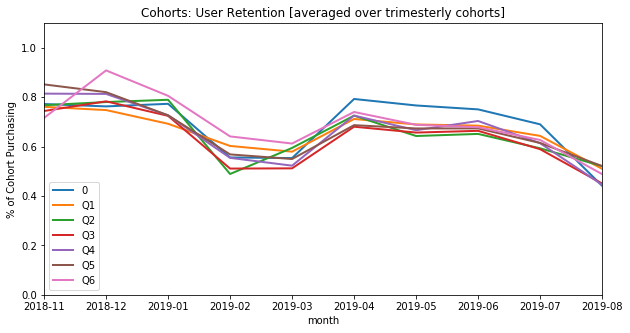

In [8]:
retention_ave=[]
retention_ave=user_retention.iloc[:,range(0,2)].mean(axis=1)
# retention_ave=user_retention.iloc[:,[0]].mean(axis=1)#.transpose()
for i in range(1,9):
    retention_ave2=user_retention.iloc[:,range(4*i-2,4*i+2)].mean(axis=1)
    retention_ave=pd.concat([retention_ave, retention_ave2.rename('Q'+str(i))], axis=1)
retention_ave.iloc[:,0:7].plot(figsize=(10,5))
plt.title('Cohorts: User Retention [averaged over trimesterly cohorts]')
plt.ylim(0, 1.1)
plt.ylabel('% of Cohort Purchasing')
print(retention_ave)
# #pd.concat([retention_ave, retention_ave2], axis=1)

Text(0, 0.5, '% of Cohort Purchasing')

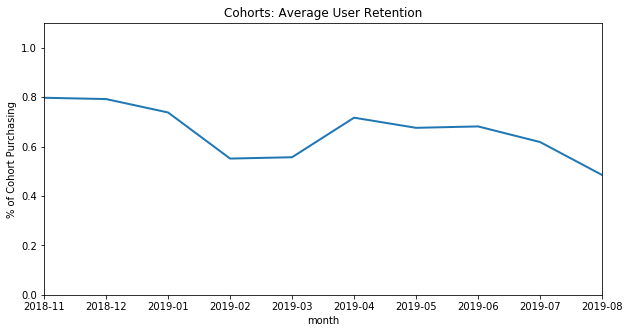

In [9]:
retention_ave3=[]
retention_ave3=user_retention.iloc[:,range(0,24)].mean(axis=1)
retention_ave3.plot(figsize=(10,5))
plt.title('Cohorts: Average User Retention')
plt.ylim(0, 1.1)
plt.ylabel('% of Cohort Purchasing')

In [10]:
user_activity=cohorts['Ave Act/User'].unstack(0)
user_activity.head()

activated,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06,2017-07,2017-08,2017-09,2017-10,2017-11,2017-12,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12,2019-01,2019-02,2019-03,2019-04,2019-05,2019-06,2019-07,2019-08,2019-09
month,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2018-11,127.0,202.0,173.0,216.0,155.0,220.0,147.0,138.0,150.0,207.0,158.0,184.0,135.0,208.0,140.0,153.0,215.0,154.0,150.0,218.0,185.0,301.0,354.0,441.0,573.0,427.0,501.0,441.0,172.0,709.0,399.0,165.0,950.0,340.0,625.0
2018-12,550.0,693.0,593.0,954.0,729.0,883.0,482.0,413.0,532.0,612.0,649.0,533.0,1379.0,579.0,720.0,587.0,864.0,829.0,755.0,771.0,862.0,921.0,1175.0,1637.0,1645.0,1491.0,803.0,1063.0,908.0,1251.0,1435.0,897.0,1637.0,2762.0,1450.0
2019-01,288.0,428.0,721.0,618.0,518.0,453.0,258.0,285.0,482.0,547.0,416.0,477.0,531.0,436.0,277.0,408.0,416.0,581.0,444.0,410.0,404.0,706.0,1054.0,878.0,1125.0,1305.0,1157.0,1125.0,850.0,1430.0,992.0,781.0,1053.0,5131.0,2215.0
2019-02,681.0,545.0,343.0,490.0,814.0,472.0,320.0,505.0,450.0,358.0,531.0,287.0,299.0,274.0,226.0,391.0,530.0,952.0,420.0,448.0,690.0,579.0,780.0,1243.0,642.0,675.0,873.0,1101.0,536.0,578.0,2056.0,421.0,1173.0,3808.0,988.0
2019-03,437.0,447.0,397.0,547.0,507.0,882.0,1045.0,310.0,284.0,337.0,355.0,185.0,415.0,350.0,399.0,373.0,611.0,548.0,363.0,369.0,612.0,510.0,539.0,709.0,672.0,581.0,573.0,977.0,1185.0,740.0,305.0,1118.0,1861.0,2245.0,920.0


Text(0, 0.5, 'Average activities')

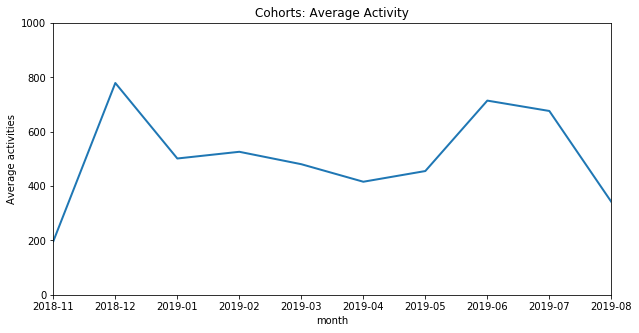

In [11]:
activity_ave3=[]
activity_ave3=user_activity.iloc[:,range(0,24)].mean(axis=1)#.transpose()

activity_ave3.plot(figsize=(10,5))
plt.title('Cohorts: Average Activity')
plt.ylim(0, 1000)
plt.ylabel('Average activities')
#plt.legend('')

Text(0, 0.5, 'Average activities')

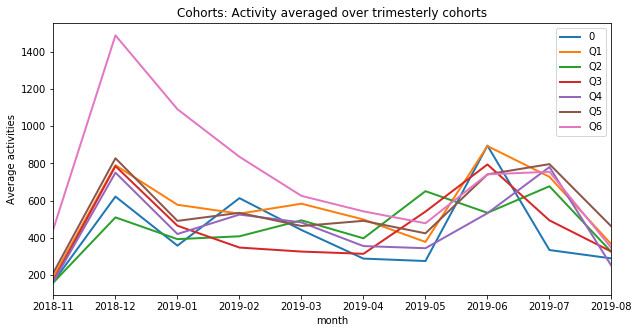

In [12]:
activity_ave=[]
activity_ave=user_activity.iloc[:,range(0,2)].mean(axis=1)#.transpose()
for i in range(1,9):
    activity_ave2=user_activity.iloc[:,range(4*i-2,4*i+2)].mean(axis=1)
    activity_ave=pd.concat([activity_ave, activity_ave2.rename('Q'+str(i))], axis=1)
activity_ave.iloc[:,0:7].plot(figsize=(10,5))
plt.title('Cohorts: Activity averaged over trimesterly cohorts')
#plt.ylim(0, 1.1)
plt.ylabel('Average activities')

In [ ]:
user_retention[['2016-11','2016-12','2017-01','2017-02','2017-03','2017-04','2017-05','2017-06']].plot(figsize=(10,5))
plt.title('Cohorts: User Retention')
plt.ylim(0, 1.1)
plt.ylabel('% of Cohort Purchasing')
#plt.legend('')

In [ ]:
user_retention[['2017-07','2017-08','2017-09','2017-10','2017-11','2017-12']].plot(figsize=(10,5))
plt.title('Cohorts: User Retention')
plt.ylim(0, 1.1)
plt.ylabel('% of Cohort Purchasing')

In [ ]:
user_retention[['2018-01','2018-02','2018-03','2018-04','2018-05','2018-06']].plot(figsize=(10,5))
plt.title('Cohorts: User Retention')
plt.ylim(0, 1.1)
plt.ylabel('% of Cohort Purchasing')